<a href="https://www.kaggle.com/code/chiagoziemcugoh/online-sales-dataset-popular-marketplace-data?scriptVersionId=181927607" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Load the dfset
pd.set_option('display.max_columns', None)

df1 = pd.read_csv('/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv')

# Data Familiarisation 

In [4]:
df1.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal
8,10009,2024-01-09,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card
9,10010,2024-01-10,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card


In [5]:
df1.tail(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
230,10231,2024-08-18,Clothing,Adidas Originals Trefoil Hoodie,4,64.99,259.96,Asia,Debit Card
231,10232,2024-08-19,Books,Dune by Frank Herbert,2,9.99,19.98,North America,Credit Card
232,10233,2024-08-20,Beauty Products,Fresh Sugar Lip Treatment,1,24.00,24.00,Europe,PayPal
233,10234,2024-08-21,Sports,Hydro Flask Standard Mouth Water Bottle,3,32.95,98.85,Asia,Credit Card
234,10235,2024-08-22,Electronics,Bose QuietComfort 35 II Wireless Headphones,1,299.00,299.00,North America,Credit Card
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal
239,10240,2024-08-27,Sports,Yeti Rambler 20 oz Tumbler,2,29.99,59.98,Asia,Credit Card


In [6]:
# make a copy of the data in order not to mess with the original data
df = df1.copy()

In [7]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [9]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [10]:
df.shape

(240, 9)

In [11]:
df.size

2160

In [12]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [13]:
# Categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical Columns:")
print(categorical_cols)

# Numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['Date', 'Product Category', 'Product Name', 'Region', 'Payment Method']

Numerical Columns:
['Transaction ID', 'Units Sold', 'Unit Price', 'Total Revenue']


# Data Cleaning

In [14]:
# check data types
df.dtypes

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

In [15]:
# Change the date data type to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# re-check data types
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object

In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

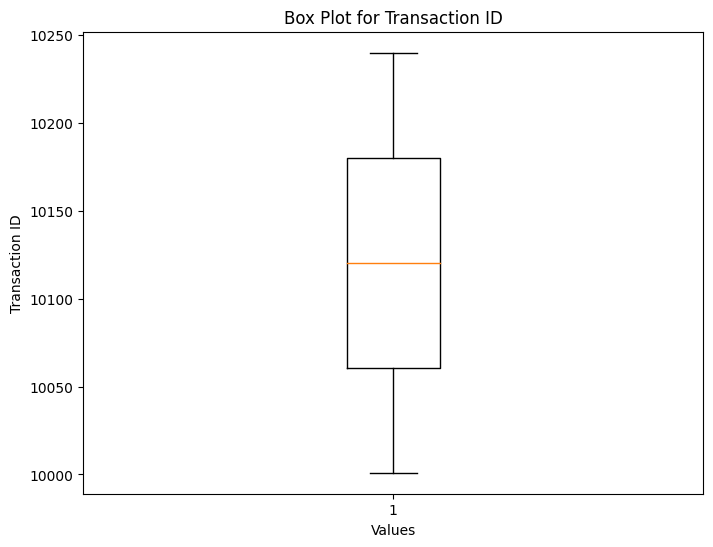

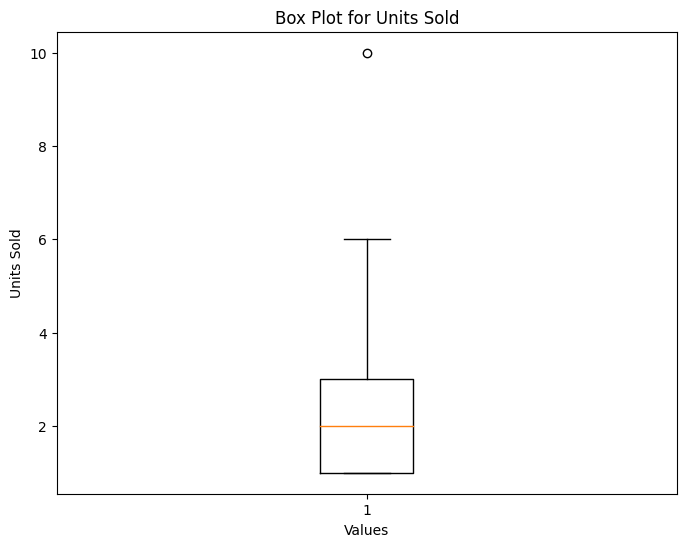

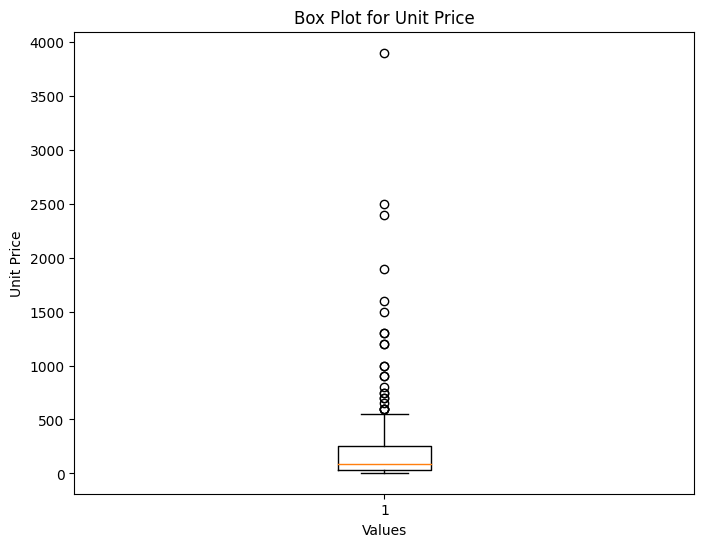

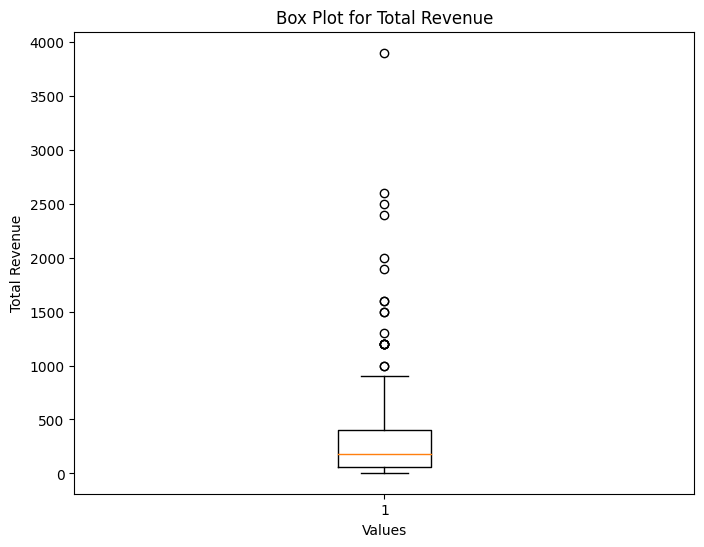

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# check for outliers

# Select numerical columns for analysis 
numerical_columns = df.select_dtypes(include=[np.number])

# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f"Box Plot for {col}")
    plt.xlabel("Values")
    plt.ylabel(col)
    plt.show()

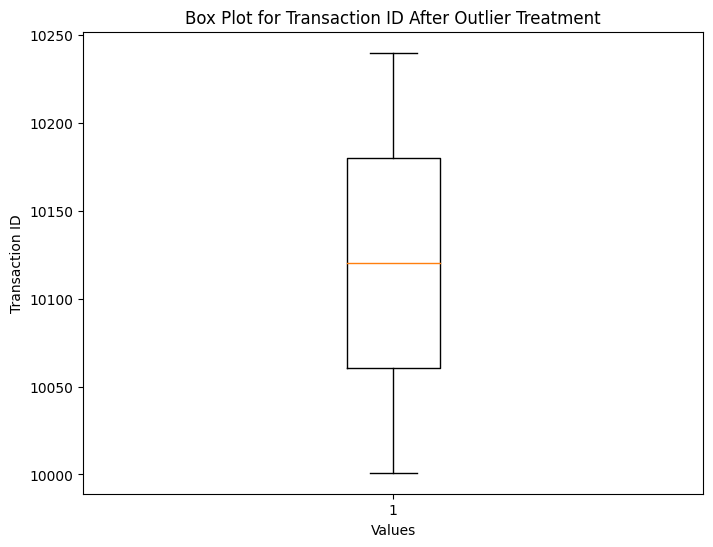

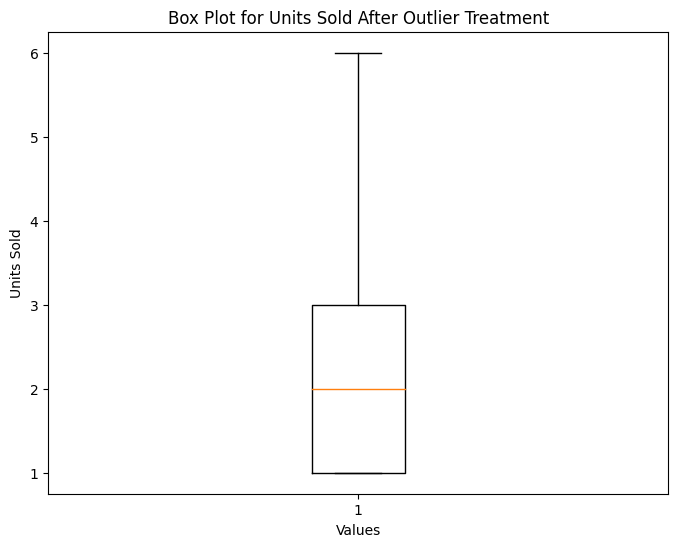

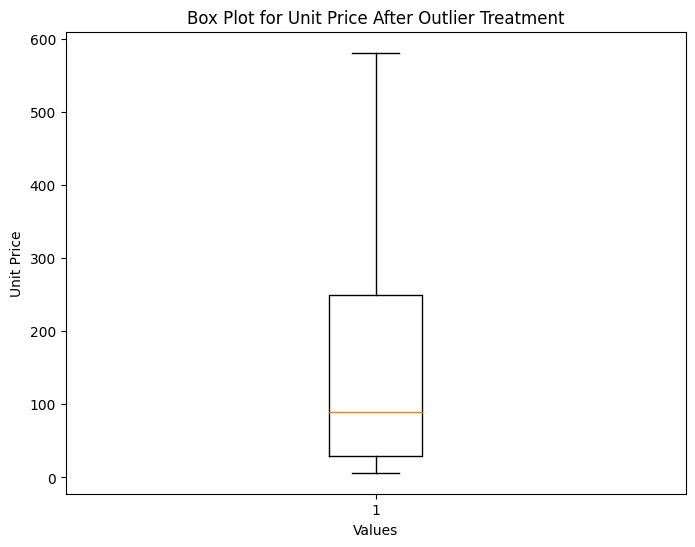

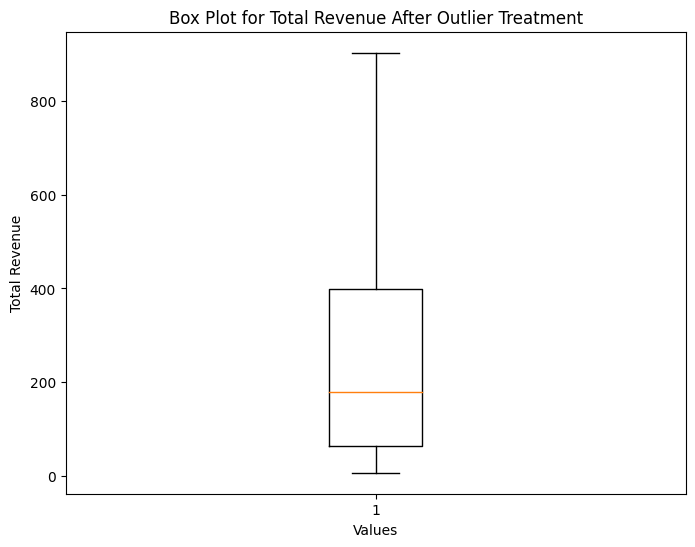

In [20]:
# treat outliers
numerical_columns = df.select_dtypes(include=[np.number])

# Function to identify and treat outliers
def treat_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    # Identify outliers based on IQR
    outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]

 
    # Winsorization (capping to bounds)
    df.loc[outliers.index, col] = np.clip(outliers[col], lower_bound, upper_bound)

    return df

# Apply outlier treatment to each numerical column
for col in numerical_columns:
    df = treat_outliers(df, col)  

# Create box plots after outlier treatment
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f"Box Plot for {col} After Outlier Treatment")
    plt.xlabel("Values")
    plt.ylabel(col)
    plt.show()

In [21]:
# rename column names
df = df.rename(columns={
    'Transaction ID': 'Transaction_ID',
    'Product Category': 'Product_Category',
    'Product Name': 'Product_Name',
    'Units Sold': 'Units_Sold',
    'Unit Price': 'Unit_Price',
    'Total Revenue': 'Total_Revenue',
    'Payment Method': 'Payment_Method'
})

### Set up SQLite connection

In [22]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('sales_data.db')

# Write the dfFrame to the SQLite dfbase
df.to_sql('df', conn, index=False, if_exists='replace')

# Define the SQL query
query = """
SELECT * FROM df
LIMIT 10
"""
result = pd.read_sql(query, conn)

# Display the query result
result

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
0,10001,2024-01-01 00:00:00,Electronics,iPhone 14 Pro,2,580.725,903.615,North America,Credit Card
1,10002,2024-01-02 00:00:00,Home Appliances,Dyson V11 Vacuum,1,499.990,499.990,Europe,PayPal
2,10003,2024-01-03 00:00:00,Clothing,Levi's 501 Jeans,3,69.990,209.970,Asia,Debit Card
3,10004,2024-01-04 00:00:00,Books,The Da Vinci Code,4,15.990,63.960,North America,Credit Card
4,10005,2024-01-05 00:00:00,Beauty Products,Neutrogena Skincare Set,1,89.990,89.990,Europe,PayPal
5,10006,2024-01-06 00:00:00,Sports,Wilson Evolution Basketball,5,29.990,149.950,Asia,Credit Card
6,10007,2024-01-07 00:00:00,Electronics,MacBook Pro 16-inch,1,580.725,903.615,North America,Credit Card
7,10008,2024-01-08 00:00:00,Home Appliances,Blueair Classic 480i,2,580.725,903.615,Europe,PayPal
8,10009,2024-01-09 00:00:00,Clothing,Nike Air Force 1,6,89.990,539.940,Asia,Debit Card
9,10010,2024-01-10 00:00:00,Books,Dune by Frank Herbert,2,25.990,51.980,North America,Credit Card


Insights:

1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.
2. Explore the popularity of different product categories across regions.
3. Investigate the impact of payment methods on sales volume or revenue.
4. Identify top-selling products within each category to optimize inventory and marketing strategies.
5. Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

The df consists of several columns, including Transaction ID, Date, Product Category, Product Name, Units Sold, Unit Price, Total Revenue, Region, and Payment Method. Let's start by addressing each of the five tasks using Python and SQLite.

**Task 1:** Analyze Sales Trends Over Time to Identify Seasonal Patterns or Growth Opportunities
To analyze sales trends over time, we will:

Aggregate the df by month and year to identify trends.


**Task 2:** Explore the Popularity of Different Product Categories Across Regions
To explore product category popularity across regions, we will:

Group the df by Product Category and Region.

Calculate the total units sold and total revenue for each combination.


**Task 3:** Investigate the Impact of Payment Methods on Sales Volume or Revenue
To investigate the impact of payment methods, we will:

Group the df by Payment Method.

Calculate the total sales volume and revenue for each method.


**Task 4:** Identify Top-Selling Products Within Each Category
To identify top-selling products within each category, we will:

Group the df by Product Category and Product Name.

Calculate the total units sold and total revenue for each product.


**Task 5:** Evaluate the Performance of Specific Products or Categories in Different Regions
To evaluate performance by region, we will:

Group the df by Product Category, Product Name, and Region.

Calculate the total units sold and total revenue for each combination.

Let's start by implementing the solutions for these tasks.

# Task 1: Analyze Sales Trends Over Time
First, we need to convert the Date column to a datetime type and extract month and year.

In [23]:
# Create an SQL query to aggregate data by year and month
query = """
    SELECT 
        strftime('%Y', Date) AS Year, 
        strftime('%m', Date) AS Month,
        SUM(Units_Sold) AS Units_Sold,
        SUM(Total_Revenue) AS Total_Revenue
    FROM 
        df
    GROUP BY 
        Year, Month
"""

# Execute the query and read the result into a DataFrame
result = pd.read_sql(query, conn)

# Display the query result
result

,Year,Month,Units_Sold,Total_Revenue
0,2024,01,68,10866.485
1,2024,02,77,8522.910
2,2024,03,78,10160.125
3,2024,04,65,9062.575
4,2024,05,60,7462.740
5,2024,06,61,7088.175
6,2024,07,53,6797.080
7,2024,08,52,5782.725


In [24]:
# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Aggregate df by year and month
monthly_sales = df.groupby(['Year', 'Month']).agg({
    'Units_Sold': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

monthly_sales

,Year,Month,Units_Sold,Total_Revenue
0,2024,1,68,10866.485
1,2024,2,77,8522.910
2,2024,3,78,10160.125
3,2024,4,65,9062.575
4,2024,5,60,7462.740
5,2024,6,61,7088.175
6,2024,7,53,6797.080
7,2024,8,52,5782.725


In [25]:
import plotly.express as px

# Convert Year and Month columns to a single datetime column
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

# Plot the data
fig = px.line(monthly_sales, x='Date', y='Units_Sold', title='Monthly Units Sold Over Time')
fig.show()

# Task 2: Explore Popularity of Product Categories Across Regions

In [26]:
# Create an SQL query to aggregate data by Product_Category and Region
query = """
    SELECT 
        Product_Category, 
        Region,
        SUM(Units_Sold) AS Units_Sold,
        SUM(Total_Revenue) AS Total_Revenue
    FROM 
        df
    GROUP BY 
        Product_Category, Region
"""

# Execute the query and read the result into a DataFrame
result = pd.read_sql(query, conn)

# Display the query result
result

,Product_Category,Region,Units_Sold,Total_Revenue
0,Beauty Products,Europe,46,2621.900
1,Books,North America,114,1861.930
2,Clothing,Asia,141,8128.930
3,Electronics,North America,66,23934.230
4,Home Appliances,Europe,59,15957.065
5,Sports,Asia,88,13238.760


In [27]:
# Group by 'Product Category' and 'Region'
category_region_sales = df.groupby(['Product_Category', 'Region']).agg({
    'Units_Sold': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

category_region_sales

,Product_Category,Region,Units_Sold,Total_Revenue
0,Beauty Products,Europe,46,2621.900
1,Books,North America,114,1861.930
2,Clothing,Asia,141,8128.930
3,Electronics,North America,66,23934.230
4,Home Appliances,Europe,59,15957.065
5,Sports,Asia,88,13238.760


In [28]:
# Plotly Express choropleth map
fig = px.choropleth(category_region_sales, 
                     locations='Region', 
                     locationmode='country names',
                     color='Units_Sold', 
                     hover_name='Region',
                     animation_frame='Product_Category',
                     title='Units Sold by Product Category and Region')

# Increase the size of the map
fig.update_layout(
    width=1000,
    height=800
)

fig.show()

In [29]:
# Visualize the data using Plotly
fig = px.bar(category_region_sales, x="Region", y="Units_Sold", color="Product_Category", barmode="group")
fig.update_layout(
    title="Units Sold by Product Category and Region",
    xaxis_title="Region",
    yaxis_title="Units Sold",
    legend_title="Product Category"
)
fig.show()

# Task 3: Investigate Impact of Payment Methods on Sales Volume or Revenue

In [30]:
query = """
    SELECT 
    Payment_Method,
    SUM(Units_Sold) AS Total_Units_Sold,
    SUM(Total_Revenue) AS Total_Revenue
FROM 
    df
GROUP BY 
    Payment_Method;
    """

# Execute the query and read the result into a DataFrame
result = pd.read_sql(query, conn)

# Display the query result
result

,Payment_Method,Total_Units_Sold,Total_Revenue
0,Credit Card,268,39034.920
1,Debit Card,141,8128.930
2,PayPal,105,18578.965


In [31]:
# Group by 'Payment Method'
payment_method_sales = df.groupby('Payment_Method').agg({
    'Units_Sold': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

payment_method_sales

,Payment_Method,Units_Sold,Total_Revenue
0,Credit Card,268,39034.920
1,Debit Card,141,8128.930
2,PayPal,105,18578.965


In [32]:
# Create bar charts for Units Sold and Total Revenue
fig_units_sold = px.bar(payment_method_sales, x='Payment_Method', y='Units_Sold', title='Units Sold by Payment Method', labels={'Units_Sold': 'Units Sold'})
fig_revenue = px.bar(payment_method_sales, x='Payment_Method', y='Total_Revenue', title='Total Revenue by Payment Method', labels={'Total_Revenue': 'Total Revenue'})

# Show the plots
fig_units_sold.show()
fig_revenue.show()

# Task 4: Identify Top-Selling Products Within Each Category

In [33]:
query = """
SELECT
    Product_Category,
    Product_Name,
    SUM(Units_Sold) AS Total_Units_Sold,
    SUM(Total_Revenue) AS Total_Revenue
FROM
    df
GROUP BY
    Product_Category,
    Product_Name
ORDER BY
    Product_Category ASC,
    Total_Units_Sold DESC,
    Product_Name ASC
    LIMIT 5;
    """

# Execute the query and read the result into a DataFrame
result = pd.read_sql(query, conn)

# Display the query result
result

,Product_Category,Product_Name,Total_Units_Sold,Total_Revenue
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,2,46.00
1,Beauty Products,CeraVe Hydrating Facial Cleanser,2,29.98
2,Beauty Products,First Aid Beauty Ultra Repair Cream,2,68.00
3,Beauty Products,Glossier Boy Brow,2,32.00
4,Beauty Products,L'Occitane Shea Butter Hand Cream,2,58.00


In [34]:
# Group by 'Product Category' and 'Product Name'
top_5_products = df.groupby(['Product_Category', 'Product_Name']).agg({
    'Units_Sold': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

# Identify top-selling products within each category
top_5_products = top_5_products.sort_values(['Product_Category', 'Units_Sold'], ascending=[True, False])

top_5_products.head()

,Product_Category,Product_Name,Units_Sold,Total_Revenue
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,2,46.00
3,Beauty Products,CeraVe Hydrating Facial Cleanser,2,29.98
13,Beauty Products,First Aid Beauty Ultra Repair Cream,2,68.00
16,Beauty Products,Glossier Boy Brow,2,32.00
19,Beauty Products,L'Occitane Shea Butter Hand Cream,2,58.00


In [35]:
# Visualize using plotly
fig = px.bar(top_5_products, 
             x='Product_Name', 
             y='Units_Sold', 
             color='Product_Category', 
             title='Top 5 Selling Products by Category',
             labels={'Units_Sold': 'Units Sold'},
             category_orders={'Product_Category': top_5_products['Product_Category'].unique()})

# Show the plot
fig.show()

# Task 5: Evaluate Performance of Products or Categories in Different Regions

In [36]:
query = """
SELECT
    Product_Category,
    Product_Name,
    Region,
    SUM(Units_Sold) AS Total_Units_Sold,
    SUM(Total_Revenue) AS Total_Revenue
FROM
    df
GROUP BY
    Product_Category,
    Product_Name,
    Region
LIMIT 5;
"""

# Execute the query and read the result into a DataFrame
result = pd.read_sql(query, conn)

# Display the query result
result

,Product_Category,Product_Name,Region,Total_Units_Sold,Total_Revenue
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,Europe,2,46.00
1,Beauty Products,Biore UV Aqua Rich Watery Essence Sunscreen,Europe,1,15.00
2,Beauty Products,Caudalie Vinoperfect Radiance Serum,Europe,1,79.00
3,Beauty Products,CeraVe Hydrating Facial Cleanser,Europe,2,29.98
4,Beauty Products,Chanel No. 5 Perfume,Europe,1,129.99


In [37]:
# Group by 'Product Category', 'Product Name', and 'Region'
product_region_performance = df.groupby(['Product_Category', 'Product_Name', 'Region']).agg({
    'Units_Sold': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

product_region_performance.head()

,Product_Category,Product_Name,Region,Units_Sold,Total_Revenue
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,Europe,2,46.00
1,Beauty Products,Biore UV Aqua Rich Watery Essence Sunscreen,Europe,1,15.00
2,Beauty Products,Caudalie Vinoperfect Radiance Serum,Europe,1,79.00
3,Beauty Products,CeraVe Hydrating Facial Cleanser,Europe,2,29.98
4,Beauty Products,Chanel No. 5 Perfume,Europe,1,129.99


In [38]:
import plotly.graph_objects as go

# Create a bar chart
fig = go.Figure()
for region in product_region_performance['Region'].unique():
    region_data = product_region_performance[product_region_performance['Region'] == region]
    fig.add_trace(go.Bar(
        x=region_data['Product_Name'],
        y=region_data['Total_Revenue'],
        name=region
    ))

# Customize the layout
fig.update_layout(
    title='Product Revenue by Region',
    xaxis_title='Product Name',
    yaxis_title='Total Revenue',
    barmode='group',
    bargap=0.1
)

# Show the plot
fig.show()

In [39]:
# Sort the DataFrame by region and total revenue to get top 5 products in each region
top_5_products_per_region = product_region_performance.groupby('Region').apply(lambda x: x.nlargest(5, 'Total_Revenue')).reset_index(drop=True)

# Pivot the sorted DataFrame
pivot_table = top_5_products_per_region.pivot(index='Product_Name', columns='Region', values='Total_Revenue')

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='Viridis'
))

# Customize the layout
fig.update_layout(
    title='Top 5 Products by Revenue in Each Region',
    xaxis_title='Region',
    yaxis_title='Product Name'
)

# Show the plot
fig.show()

# Predictive Analysis

In [40]:
# Select the numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_cols.corr()

# Create the Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    x=numerical_cols.columns,
    y=numerical_cols.columns,
    z=corr_matrix.values,
    colorscale='RdBu',
    zmin=-1,
    zmax=1
))

fig.update_layout(
    title='Correlation Matrix',
    xaxis_title='Features',
    yaxis_title='Features',
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="black"
    )
)

fig.show()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Units_Sold', 'Unit_Price', 'Product_Category', 'Region', 'Payment_Method']]
y = df['Total_Revenue']

# Encode categorical features
X = pd.get_dummies(X, columns=['Product_Category', 'Region', 'Payment_Method'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 11814.077575418827
R-squared: 0.8525616441882444


In [42]:
original_feature_names = list(X.columns)
print(original_feature_names)

['Units_Sold', 'Unit_Price', 'Product_Category_Beauty Products', 'Product_Category_Books', 'Product_Category_Clothing', 'Product_Category_Electronics', 'Product_Category_Home Appliances', 'Product_Category_Sports', 'Region_Asia', 'Region_Europe', 'Region_North America', 'Payment_Method_Credit Card', 'Payment_Method_Debit Card', 'Payment_Method_PayPal']


In [43]:
# Example prediction
new_data = pd.DataFrame({'Product_Category': ['Electronics'],
                         'Units_Sold': [100],
                         'Unit_Price': [500],
                         'Region': ['North America'],
                         'Payment_Method': ['Credit Card']})

# Encode the new data
new_data = pd.get_dummies(new_data, columns=['Product_Category', 'Region', 'Payment_Method'])

# Ensure all feature columns are present, even if 0 valued
all_features = ['Units_Sold', 'Unit_Price', 'Product_Category_Beauty Products', 'Product_Category_Books', 'Product_Category_Clothing', 'Product_Category_Electronics', 'Product_Category_Home Appliances', 'Product_Category_Sports', 'Region_Asia', 'Region_Europe', 'Region_North America', 'Payment_Method_Credit Card', 'Payment_Method_Debit Card', 'Payment_Method_PayPal']
new_data = new_data.reindex(all_features, axis=1, fill_value=0)

# Make the prediction
prediction = model.predict(new_data)
print("Predicted Total Revenue:", prediction[0])

Predicted Total Revenue: 6566.829107963517


In [44]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.7 MB/s eta 0:00:0000:0100:01


# DashBoard

In [45]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Convert Year and Month columns to a single datetime column
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

# Plotly Express choropleth map
fig_choropleth = px.choropleth(category_region_sales, 
                     locations='Region', 
                     locationmode='country names',
                     color='Units_Sold', 
                     hover_name='Region',
                     animation_frame='Product_Category',
                     title='Units Sold by Product Category and Region')

# Increase the size of the map
fig_choropleth.update_layout(
    width=1000,
    height=800
)

# Visualize the data using Plotly
fig_bar = px.bar(category_region_sales, x="Region", y="Units_Sold", color="Product_Category", barmode="group")
fig_bar.update_layout(
    title="Units Sold by Product Category and Region",
    xaxis_title="Region",
    yaxis_title="Units Sold",
    legend_title="Product Category"
)

# Create bar charts for Units Sold and Total Revenue
fig_units_sold = px.bar(payment_method_sales, x='Payment_Method', y='Units_Sold', title='Units Sold by Payment Method', labels={'Units_Sold': 'Units Sold'})
fig_revenue = px.bar(payment_method_sales, x='Payment_Method', y='Total_Revenue', title='Total Revenue by Payment Method', labels={'Total_Revenue': 'Total Revenue'})

# Visualize using plotly
fig_top_5_products = px.bar(top_5_products, 
             x='Product_Name', 
             y='Units_Sold', 
             color='Product_Category', 
             title='Top 5 Selling Products by Category',
             labels={'Units_Sold': 'Units Sold'},
             category_orders={'Product_Category': top_5_products['Product_Category'].unique()})

# Create a bar chart
fig_product_revenue_by_region = go.Figure()
for region in product_region_performance['Region'].unique():
    region_data = product_region_performance[product_region_performance['Region'] == region]
    fig_product_revenue_by_region.add_trace(go.Bar(
        x=region_data['Product_Name'],
        y=region_data['Total_Revenue'],
        name=region
    ))

# Customize the layout
fig_product_revenue_by_region.update_layout(
    title='Product Revenue by Region',
    xaxis_title='Product Name',
    yaxis_title='Total Revenue',
    barmode='group',
    bargap=0.1
)

# Sort the DataFrame by region and total revenue to get top 5 products in each region
top_5_products_per_region = product_region_performance.groupby('Region').apply(lambda x: x.nlargest(5, 'Total_Revenue')).reset_index(drop=True)

# Pivot the sorted DataFrame
pivot_table = top_5_products_per_region.pivot(index='Product_Name', columns='Region', values='Total_Revenue')

# Create the heatmap
fig_top_5_products_by_revenue_heatmap = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='Viridis'
))

# Customize the layout
fig_top_5_products_by_revenue_heatmap.update_layout(
    title='Top 5 Products by Revenue in Each Region',
    xaxis_title='Region',
    yaxis_title='Product Name'
)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='region-dropdown',
        options=[{'label': region, 'value': region} for region in df['Region'].unique()],
        value='All Regions',
        placeholder='Select a Region'
    ),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': category, 'value': category} for category in df['Product_Category'].unique()],
        value='All Categories',
        placeholder='Select a Product Category'
    ),
    dcc.Dropdown(
        id='payment-dropdown',
        options=[{'label': method, 'value': method} for method in df['Payment_Method'].unique()],
        value='All Payment Methods',
        placeholder='Select a Payment Method'
    ),
    html.Div(id='output-container'),
    dcc.Graph(
        id='choropleth-map',
        figure=fig_choropleth
    ),
    dcc.Graph(
        id='bar-chart',
        figure=fig_bar
    ),
    dcc.Graph(
        id='units-sold-bar',
        figure=fig_units_sold
    ),
    dcc.Graph(
        id='revenue-bar',
        figure=fig_revenue
    ),
    dcc.Graph(
        id='top-5-products-bar',
        figure=fig_top_5_products
    ),
    dcc.Graph(
        id='product-revenue-by-region-bar',
        figure=fig_product_revenue_by_region
    ),
    dcc.Graph(
        id='top-5-products-by-revenue-heatmap',
        figure=fig_top_5_products_by_revenue_heatmap
    )
])

# Define callback to update graphs based on dropdown selection
@app.callback(
    Output('choropleth-map', 'figure'),
    Output('bar-chart', 'figure'),
    Output('units-sold-bar', 'figure'),
    Output('revenue-bar', 'figure'),
    Output('top-5-products-bar', 'figure'),
    Output('product-revenue-by-region-bar', 'figure'),
    Output('top-5-products-by-revenue-heatmap', 'figure'),
    Input('region-dropdown', 'value'),
    Input('category-dropdown', 'value'),
    Input('payment-dropdown', 'value')
)
def update_graphs(region, category, payment):
    filtered_df = df.copy()
    
    if region != 'All Regions':
        filtered_df = filtered_df[filtered_df['Region'] == region]
    
    if category != 'All Categories':
        filtered_df = filtered_df[filtered_df['Product_Category'] == category]
    
    if payment != 'All Payment Methods':
        filtered_df = filtered_df[filtered_df['Payment_Method'] == payment]
    
    # Recalculate figures based on filtered data
    # Plotly Express choropleth map
    fig_choropleth = px.choropleth(filtered_df, 
                     locations='Region', 
                     locationmode='country names',
                     color='Units_Sold', 
                     hover_name='Region',
                     animation_frame='Product_Category',
                     title='Units Sold by Product Category and Region')

    # Increase the size of the map
    fig_choropleth.update_layout(
        width=1000,
        height=800
    )

    # Visualize the data using Plotly
    fig_bar = px.bar(filtered_df, x="Region", y="Units_Sold", color="Product_Category", barmode="group")
    fig_bar.update_layout(
        title="Units Sold by Product Category and Region",
        xaxis_title="Region",
        yaxis_title="Units Sold",
        legend_title="Product Category"
    )

    # Create bar charts for Units Sold and Total Revenue
    fig_units_sold = px.bar(filtered_df, x='Payment_Method', y='Units_Sold', title='Units Sold by Payment Method', labels={'Units_Sold': 'Units Sold'})
    fig_revenue = px.bar(filtered_df, x='Payment_Method', y='Total_Revenue', title='Total Revenue by Payment Method', labels={'Total_Revenue': 'Total Revenue'})

    # Visualize using plotly
    fig_top_5_products = px.bar(filtered_df, 
                 x='Product_Name', 
                 y='Units_Sold', 
                 color='Product_Category', 
                 title='Top 5 Selling Products by Category',
                 labels={'Units_Sold': 'Units Sold'},
                 category_orders={'Product_Category': filtered_df['Product_Category'].unique()})

    # Create a bar chart
    fig_product_revenue_by_region = go.Figure()
    for region in filtered_df['Region'].unique():
        region_data = filtered_df[filtered_df['Region'] == region]
        fig_product_revenue_by_region.add_trace(go.Bar(
            x=region_data['Product_Name'],
            y=region_data['Total_Revenue'],
            name=region
        ))

    # Customize the layout
    fig_product_revenue_by_region.update_layout(
        title='Product Revenue by Region',
        xaxis_title='Product Name',
        yaxis_title='Total Revenue',
        barmode='group',
        bargap=0.1
    )

    # Sort the DataFrame by region and total revenue to get top 5 products in each region
    top_5_products_per_region = filtered_df.groupby('Region').apply(lambda x: x.nlargest(5, 'Total_Revenue')).reset_index(drop=True)

    # Pivot the sorted DataFrame
    pivot_table = top_5_products_per_region.pivot(index='Product_Name', columns='Region', values='Total_Revenue')

    # Create the heatmap
    fig_top_5_products_by_revenue_heatmap = go.Figure(data=go.Heatmap(
        z=pivot_table.values,
        x=pivot_table.columns,
        y=pivot_table.index,
        colorscale='Viridis'
    ))

    # Customize the layout
    fig_top_5_products_by_revenue_heatmap.update_layout(
        title='Top 5 Products by Revenue in Each Region',
        xaxis_title='Region',
        yaxis_title='Product Name'
    )

    return fig_choropleth, fig_bar, fig_units_sold, fig_revenue, fig_top_5_products, fig_product_revenue_by_region, fig_top_5_products_by_revenue_heatmap

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)